In [6]:
import pandas as pd
import datetime as dt

data = pd.read_csv("rfm_xmas19.txt", parse_dates=["trans_date"])
group_by_customer = data.groupby("customer_id")
last_transaction = group_by_customer["trans_date"].max()

best_churn = pd.DataFrame(last_transaction)
cutoff_day = dt.datetime(2019, 10, 16)

best_churn["churned"] = best_churn["trans_date"].apply(
    lambda date: 1 if date < cutoff_day else 0)


In [7]:
data

,customer_id,trans_date,tran_amount
0,FM5295,2017-11-11,35
1,FM4768,2019-12-15,39
2,FM2122,2017-11-26,52
3,FM1217,2016-08-16,99
4,FM1850,2018-08-20,78
...,...,...,...
124995,FM8433,2016-03-26,64
124996,FM7232,2019-05-19,38
124997,FM8731,2019-08-28,42
124998,FM8133,2018-09-14,13


In [8]:
best_churn["nr_of_transactions"] = group_by_customer.size()
best_churn["amount_spent"] = group_by_customer.sum()
best_churn.drop("trans_date", axis="columns", inplace=True)

In [9]:
best_churn

,churned,nr_of_transactions,amount_spent
customer_id,,,
FM1112,1,15,1012
FM1113,0,20,1490
FM1114,0,19,1432
FM1115,0,22,1659
FM1116,1,13,857
...,...,...,...
FM8996,1,13,582
FM8997,1,14,543
FM8998,1,13,624


In [10]:
best_churn["scaled_tran"] = (best_churn["nr_of_transactions"] \
                             - best_churn["nr_of_transactions"].min()) \
                             / (best_churn["nr_of_transactions"].max() \
                             - best_churn["nr_of_transactions"].min())
best_churn["scaled_amount"] = (best_churn["amount_spent"] \
                               -best_churn["amount_spent"].min()) \
                               / (best_churn["amount_spent"].max() \
                               - best_churn["amount_spent"].min())
best_churn["score"] = 100*(.5*best_churn["scaled_tran"] \
                           + .5*best_churn["scaled_amount"])

best_churn.sort_values("score", inplace=True, ascending=False)

In [11]:
best_churn

,churned,nr_of_transactions,amount_spent,scaled_tran,scaled_amount,score
customer_id,,,,,,
FM4424,0,39,2933,1.000000,1.000000,100.000000
FM4320,1,38,2647,0.971429,0.897270,93.434934
FM3799,1,36,2513,0.914286,0.849138,88.171182
FM5109,0,35,2506,0.885714,0.846624,86.616892
FM3805,1,35,2453,0.885714,0.827586,85.665025
...,...,...,...,...,...,...
FM7716,1,4,221,0.000000,0.025862,1.293103
FM7224,1,4,191,0.000000,0.015086,0.754310
FM8504,0,4,190,0.000000,0.014727,0.736351


In [14]:
coupon = data['tran_amount'].mean() * 0.3

nr_of_customers = 1000/coupon
print(coupon, nr_of_customers, sep="\n")

19.4975736
51.28843314123969


In [21]:
top_50_churned = best_churn.loc[best_churn["churned"] == 1].head(50)

top_50_churned.to_csv("best_customers.txt")
top_50_churned

,churned,nr_of_transactions,amount_spent,scaled_tran,scaled_amount,score
customer_id,,,,,,
FM4320,1,38,2647,0.971429,0.897270,93.434934
FM3799,1,36,2513,0.914286,0.849138,88.171182
FM3805,1,35,2453,0.885714,0.827586,85.665025
FM5752,1,33,2612,0.828571,0.884698,85.663485
FM4074,1,34,2462,0.857143,0.830819,84.398091
FM1215,1,35,2362,0.885714,0.794899,84.030686
FM2620,1,35,2360,0.885714,0.794181,83.994766
FM1580,1,33,2329,0.828571,0.783046,80.580870
FM2951,1,32,2382,0.800000,0.802083,80.104167


# NEXT EXAMPLE

In [13]:
import pandas as pd

playstore = pd.read_csv("googleplaystore.csv")
print(playstore.shape)

answer="no" # We don't care about free apps for this project

playstore.drop(labels=10472, inplace=True)
playstore.head(10)

(10841, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [15]:
def clean_size(size):
    """Convert file size string to float and megabytes"""
    size = size.replace("M","")
    if size.endswith("k"):
        size = float(size[:-1])/1000
    elif size == "Varies with device":
        size = pd.np.NaN
    else:
        size = float(size)
    return size
playstore["Price"] = playstore["Price"].str.replace("$", "").astype("float")

paid = playstore[playstore["Price"] != 0].copy()
paid.drop("Type", axis="columns", inplace=True)
paid["Reviews"] = paid["Reviews"].astype(int)
paid["Size"] = paid["Size"].apply(clean_size).astype(float)
paid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 234 to 10798
Data columns (total 12 columns):
App               800 non-null object
Category          800 non-null object
Rating            647 non-null float64
Reviews           800 non-null int32
Size              724 non-null float64
Installs          800 non-null object
Price             800 non-null float64
Content Rating    800 non-null object
Genres            800 non-null object
Last Updated      800 non-null object
Current Ver       798 non-null object
Android Ver       799 non-null object
dtypes: float64(3), int32(1), object(8)
memory usage: 78.1+ KB


In [17]:
paid.head(30)

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.800,"100,000+",4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39.000,"100,000+",4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.800,"100,000+",4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39.000,"100,000+",4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,NaN,"100,000+",3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up
476,"Moco+ - Chat, Meet People",DATING,4.2,1545,NaN,"10,000+",3.99,Mature 17+,Dating,"June 19, 2018",2.6.139,4.1 and up
477,Calculator,DATING,2.6,57,6.200,"1,000+",6.99,Everyone,Dating,"October 25, 2017",1.1.6,4.0 and up
478,Truth or Dare Pro,DATING,NaN,0,20.000,50+,1.49,Teen,Dating,"September 1, 2017",1.0,4.0 and up
479,"Private Dating, Hide App- Blue for PrivacyHider",DATING,NaN,0,0.018,100+,2.99,Everyone,Dating,"July 25, 2017",1.0.1,4.0 and up
480,Ad Blocker for SayHi,DATING,NaN,4,1.200,100+,3.99,Teen,Dating,"August 2, 2018",1.2,4.0.3 and up


In [18]:
print(
    "Number of rows before dropping duplicates: {}".format(paid.shape[0])
)
paid.drop_duplicates(inplace=True)
print(
    "Number of rows after dropping duplicates: {}".format(paid.shape[0])
)

app_mask = paid["App"].isin(
    ["Fuzzy Numbers: Pre-K Number Foundation", "Toca Life: City"]
)

category_mask = paid["Category"] == "FAMILY"

paid[app_mask & category_mask]

paid.sort_values("Reviews", ascending=False, inplace=True)
paid.drop_duplicates("App", inplace=True)
print(paid.duplicated("App").sum())
paid.reset_index(inplace=True, drop=True)

Number of rows before dropping duplicates: 800
Number of rows after dropping duplicates: 765
0


In [19]:
paid.head(20)

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Minecraft,FAMILY,4.5,2376564,NaN,"10,000,000+",6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device
1,Hitman Sniper,GAME,4.6,408292,29.0,"10,000,000+",0.99,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up
2,Grand Theft Auto: San Andreas,GAME,4.4,348962,26.0,"1,000,000+",6.99,Mature 17+,Action,"March 21, 2015",1.08,3.0 and up
3,Bloons TD 5,FAMILY,4.6,190086,94.0,"1,000,000+",2.99,Everyone,Strategy,"July 13, 2018",3.16,2.3.3 and up
4,Where's My Water?,FAMILY,4.7,188740,69.0,"1,000,000+",1.99,Everyone,Puzzle;Brain Games,"July 5, 2018",1.16.0,4.2 and up
5,Card Wars - Adventure Time,FAMILY,4.3,129603,23.0,"1,000,000+",2.99,Everyone 10+,Card;Action & Adventure,"February 11, 2016",1.11.0,2.3.3 and up
6,True Skate,SPORTS,4.4,129409,73.0,"1,000,000+",1.99,Everyone,Sports,"August 4, 2018",1.5.1,4.0.3 and up
7,Five Nights at Freddy's,GAME,4.6,100805,50.0,"1,000,000+",2.99,Teen,Action,"December 2, 2014",1.85,2.3 and up
8,Beautiful Widgets Pro,PERSONALIZATION,4.2,97890,14.0,"1,000,000+",2.49,Everyone,Personalization,"August 24, 2016",5.7.8,2.3 and up
9,DraStic DS Emulator,GAME,4.6,87766,12.0,"1,000,000+",4.99,Everyone,Action,"July 19, 2016",r2.5.0.3a,2.3 and up


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026149A411C8>]],
      dtype=object)

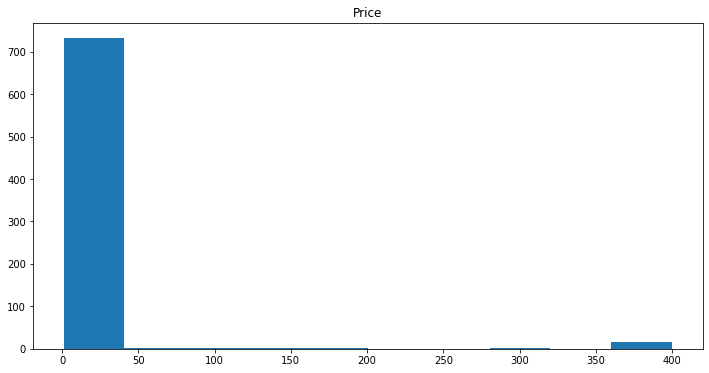

In [21]:
paid.hist(column="Price", grid=False, figsize=(12,6))

In [23]:
affordable_apps = paid[paid["Price"]<50].copy()
affordable_apps

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Minecraft,FAMILY,4.5,2376564,NaN,"10,000,000+",6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device
1,Hitman Sniper,GAME,4.6,408292,29.000,"10,000,000+",0.99,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up
2,Grand Theft Auto: San Andreas,GAME,4.4,348962,26.000,"1,000,000+",6.99,Mature 17+,Action,"March 21, 2015",1.08,3.0 and up
3,Bloons TD 5,FAMILY,4.6,190086,94.000,"1,000,000+",2.99,Everyone,Strategy,"July 13, 2018",3.16,2.3.3 and up
4,Where's My Water?,FAMILY,4.7,188740,69.000,"1,000,000+",1.99,Everyone,Puzzle;Brain Games,"July 5, 2018",1.16.0,4.2 and up
...,...,...,...,...,...,...,...,...,...,...,...,...
751,25WPM Amateur ham radio Koch CW Morse code tra...,TOOLS,NaN,0,3.700,10+,1.49,Everyone,Tools,"May 18, 2018",2.0.3,2.1 and up
752,Masha and the Bear- House Cleaning Games for G...,FAMILY,NaN,0,74.000,100+,1.99,Everyone,Educational;Pretend Play,"January 25, 2018",0.0.1,4.1 and up
753,BI Barcode Scanner,PRODUCTIVITY,NaN,0,0.473,10+,0.99,Everyone,Productivity,"June 13, 2014",2.2,2.2 and up
754,P Icon Pack,FAMILY,NaN,0,21.000,10+,0.99,Everyone,Entertainment,"July 16, 2018",1.0.6,4.0.3 and up


In [25]:
paid.sort_values(by="Price", ascending=False).head(50)

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
278,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.300,"10,000+",400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
207,I am Rich Plus,FAMILY,4.0,856,8.700,"10,000+",399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
443,I AM RICH PRO PLUS,FINANCE,4.0,36,41.000,"1,000+",399.99,Everyone,Finance,"June 25, 2018",1.0.2,4.1 and up
306,I Am Rich Pro,FAMILY,4.4,201,2.700,"5,000+",399.99,Everyone,Entertainment,"May 30, 2017",1.54,1.6 and up
314,I am Rich,FINANCE,4.3,180,3.800,"5,000+",399.99,Everyone,Finance,"March 22, 2018",1.0,4.2 and up
155,I Am Rich Premium,FINANCE,4.1,1867,4.700,"50,000+",399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
567,most expensive app (H),FAMILY,4.3,6,1.500,100+,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
125,I am rich,LIFESTYLE,3.8,3547,1.800,"100,000+",399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
737,I'm Rich/Eu sou Rico/أنا غني/我很有錢,LIFESTYLE,NaN,0,40.000,0+,399.99,Everyone,Lifestyle,"December 1, 2017",MONEY,4.1 and up
243,I am rich(premium),FINANCE,3.5,472,0.965,"5,000+",399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002614B388448>]],
      dtype=object)

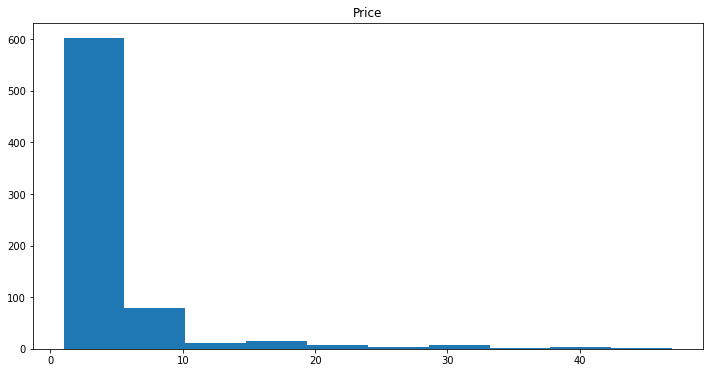

In [26]:
affordable_apps = paid[paid["Price"]<50].copy()
affordable_apps.hist(column="Price", grid=False, figsize=(12,6))

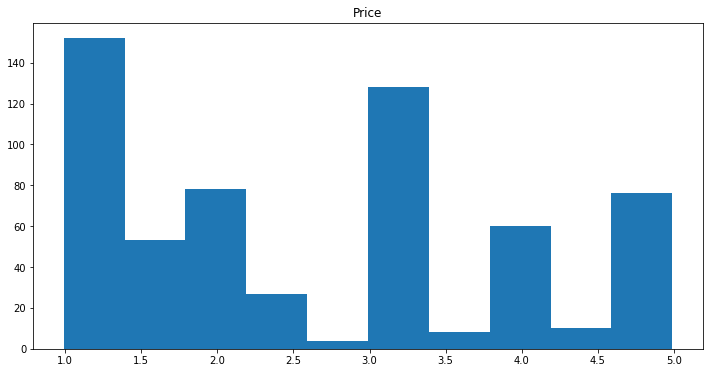

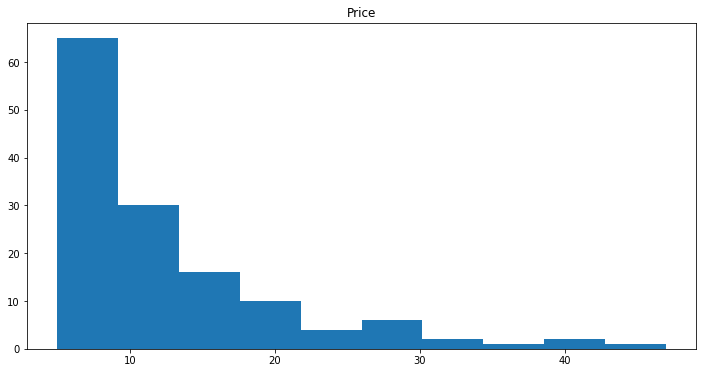

In [27]:
affordable_apps = paid[paid["Price"]<50].copy()
cheap = affordable_apps["Price"]<5
reasonable = affordable_apps["Price"]>=5

affordable_apps[cheap].hist(column="Price", grid=False, figsize=(12,6))
affordable_apps[reasonable].hist(column="Price", grid=False, figsize=(12,6))
affordable_apps["affordability"] = affordable_apps.apply(
    lambda row: "cheap" if row["Price"] < 5 else "reasonable",
    axis=1
)

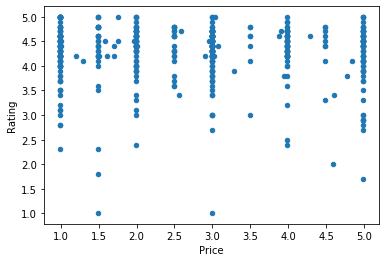

In [28]:
affordable_apps[cheap].plot(kind="scatter", x="Price", y="Rating")

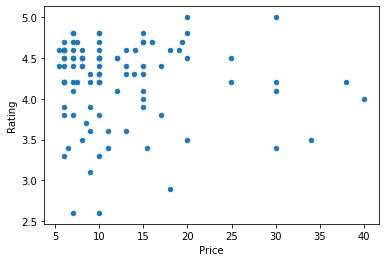

In [30]:
cheap = affordable_apps["Price"] < 5
reasonable = affordable_apps["Price"] >= 5

cheap_mean = affordable_apps[cheap]["Price"].mean()

affordable_apps.loc[cheap, "price_criterion"] = affordable_apps["Price"].apply(
    lambda price: 1 if price < cheap_mean else 0
)

affordable_apps[reasonable].plot(kind="scatter", x="Price", y="Rating")

reasonable_mean = affordable_apps.loc[reasonable, "Price"].mean()

affordable_apps.loc[reasonable,"price_criterion"] = affordable_apps["Price"].apply(
    lambda price: 1 if price < reasonable_mean else 0
)

In [31]:
affordable_apps["genre_count"] = affordable_apps["Genres"].str.count(";")+1

genres_mean = affordable_apps.groupby(
    ["affordability", "genre_count"]
).mean()[["Price"]]


def label_genres(row):
    """For each segment in `genres_mean`,
    labels the apps that cost less than its segment's mean with `1`
    and the others with `0`."""

    aff = row["affordability"]
    gc = row["genre_count"]
    price = row["Price"]

    if price < genres_mean.loc[(aff, gc)][0]:
        return 1
    else:
        return 0

affordable_apps["genre_criterion"] = affordable_apps.apply(
    label_genres, axis="columns"
)


categories_mean = affordable_apps.groupby(
    ["affordability", "Category"]
).mean()[["Price"]]

def label_categories(row):
    """For each segment in `categories_mean`,
    labels the apps that cost less than its segment's mean with `1`
    and the others with `0`."""

    aff = row["affordability"]
    cat = row["Category"]
    price = row["Price"]

    if price < categories_mean.loc[(aff, cat)][0]:
        return 1
    else:
        return 0

affordable_apps["category_criterion"] = affordable_apps.apply(
    label_categories, axis="columns"
)

In [32]:
affordable_apps

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,affordability,price_criterion,genre_count,genre_criterion,category_criterion
0,Minecraft,FAMILY,4.5,2376564,NaN,"10,000,000+",6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device,reasonable,1.0,2,0,1
1,Hitman Sniper,GAME,4.6,408292,29.000,"10,000,000+",0.99,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up,cheap,1.0,1,1,1
2,Grand Theft Auto: San Andreas,GAME,4.4,348962,26.000,"1,000,000+",6.99,Mature 17+,Action,"March 21, 2015",1.08,3.0 and up,reasonable,1.0,1,1,1
3,Bloons TD 5,FAMILY,4.6,190086,94.000,"1,000,000+",2.99,Everyone,Strategy,"July 13, 2018",3.16,2.3.3 and up,cheap,0.0,1,0,0
4,Where's My Water?,FAMILY,4.7,188740,69.000,"1,000,000+",1.99,Everyone,Puzzle;Brain Games,"July 5, 2018",1.16.0,4.2 and up,cheap,1.0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,25WPM Amateur ham radio Koch CW Morse code tra...,TOOLS,NaN,0,3.700,10+,1.49,Everyone,Tools,"May 18, 2018",2.0.3,2.1 and up,cheap,1.0,1,1,1
752,Masha and the Bear- House Cleaning Games for G...,FAMILY,NaN,0,74.000,100+,1.99,Everyone,Educational;Pretend Play,"January 25, 2018",0.0.1,4.1 and up,cheap,1.0,2,1,1
753,BI Barcode Scanner,PRODUCTIVITY,NaN,0,0.473,10+,0.99,Everyone,Productivity,"June 13, 2014",2.2,2.2 and up,cheap,1.0,1,1,1
754,P Icon Pack,FAMILY,NaN,0,21.000,10+,0.99,Everyone,Entertainment,"July 16, 2018",1.0.6,4.0.3 and up,cheap,1.0,1,1,1


In [33]:
criteria = ["price_criterion", "genre_criterion", "category_criterion"]
affordable_apps["Result"] = affordable_apps[criteria].mode(axis='columns')
affordable_apps.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,affordability,price_criterion,genre_count,genre_criterion,category_criterion,Result
167,THE aMAZEing Labyrinth,FAMILY,3.9,1615,1.2,"10,000+",4.99,Everyone,Board;Brain Games,"February 9, 2016",1.0.3,4.0 and up,cheap,0.0,2,0,0,0.0
498,Blackjack Verite Drills,GAME,4.6,17,4.7,100+,14.00,Teen,Casino,"July 9, 2017",1.1.10,3.0 and up,reasonable,0.0,1,0,0,0.0
346,I am Rich Person,LIFESTYLE,4.2,134,1.8,"1,000+",37.99,Everyone,Lifestyle,"July 18, 2017",1.0,4.0.3 and up,reasonable,0.0,1,0,0,0.0
457,CURSUM B,GAME,NaN,30,26.0,500+,0.99,Everyone,Racing,"June 20, 2017",1.0.0,2.3 and up,cheap,1.0,1,1,1,1.0
519,Radiological Anatomy For FRCR1,MEDICAL,4.8,12,44.0,100+,6.99,Everyone,Medical,"January 22, 2014",1.3,4.0 and up,reasonable,1.0,1,1,1,1.0


In [34]:
criteria = ["price_criterion", "genre_criterion", "category_criterion"]
affordable_apps["Result"] = affordable_apps[criteria].mode(axis='columns')
affordable_apps.sample(5)

nr_eligible = affordable_apps["Result"].sum()
print(nr_eligible, nr_eligible/affordable_apps.shape[0], sep="\n")

def new_price(row):
    if row["affordability"] == "cheap":
        return round(max(row["Price"], cheap_mean), 2)
    else:
        return round(max(row["Price"], reasonable_mean), 2)
    
affordable_apps["New Price"] = affordable_apps.apply(new_price, axis="columns")

affordable_apps["Installs"] = affordable_apps["Installs"].str.replace("[+,]", "").astype(int)

affordable_apps["Impact"] = (affordable_apps["New Price"]-affordable_apps["Price"])*affordable_apps["Installs"]

total_impact = affordable_apps["Impact"].sum()
print(total_impact)

affordable_apps.sample(20)

401.0
0.5470668485675307
115441618.98


,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,affordability,price_criterion,genre_count,genre_criterion,category_criterion,Result,New Price,Impact
490,ACCDB MDB DB Manager Pro - Editor for MS Access,PRODUCTIVITY,3.1,19,4.500,500,8.99,Everyone,Productivity,"November 3, 2016",1.0.8,4.0 and up,reasonable,1.0,1,1,0,1.0,12.45,1730.0
593,EP Calipers,MEDICAL,NaN,4,15.000,100,0.99,Everyone,Medical,"February 10, 2018",2.12,4.0 and up,cheap,1.0,1,1,1,1.0,2.58,159.0
241,Lunar Calendar,LIFESTYLE,4.5,484,NaN,1000,4.99,Mature 17+,Lifestyle,"July 17, 2018",Varies with device,Varies with device,cheap,0.0,1,0,0,0.0,4.99,0.0
558,B-17 Flying Fortress WWII LWP,PERSONALIZATION,NaN,7,14.000,100,1.49,Everyone,Personalization,"December 22, 2016",1.0,4.1 and up,cheap,1.0,1,1,1,1.0,2.58,109.0
518,Monastery of El Escorial,TRAVEL_AND_LOCAL,NaN,12,50.000,1000,1.99,Everyone,Travel & Local,"May 30, 2016",1.0,4.0 and up,cheap,1.0,1,1,1,1.0,2.58,590.0
292,Campervan.Guide Pro,TRAVEL_AND_LOCAL,4.2,238,67.000,10000,5.99,Everyone,Travel & Local,"June 22, 2018",4.6.2,4.1 and up,reasonable,1.0,1,1,1,1.0,12.45,64600.0
514,Bo's Bedtime Story,FAMILY,4.2,13,23.000,1000,2.49,Everyone,Education;Pretend Play,"December 25, 2017",2.6,4.0.3 and up,cheap,1.0,2,1,1,1.0,2.58,90.0
364,Watch Face BW Inter,PERSONALIZATION,3.1,112,8.800,1000,0.99,Everyone,Personalization,"April 26, 2017",2.1.7,4.3 and up,cheap,1.0,1,1,1,1.0,2.58,1590.0
673,meStudying: AP English Lit,FAMILY,5.0,1,0.655,10,4.99,Everyone,Education,"August 31, 2013",1.3,2.0.1 and up,cheap,0.0,1,0,0,0.0,4.99,0.0
491,Pixel Oreo/P Dark White AMOLED UI - Icon Pack,PERSONALIZATION,4.8,18,16.000,5000,1.49,Everyone,Personalization,"June 21, 2018",5.1,4.0.3 and up,cheap,1.0,1,1,1,1.0,2.58,5450.0
